# Final Examination

Due: December 15, 2024

Name: Eric Wu


## Problem 1:  Simultaneous Equations

Determine the values of x, y, z, and w for the following equations:

0.14 x + 0.20 y + 0.50 z + 0.47 w = -0.181

0.49 y + 0.19 z + 0.55 w - 0.51 x = 0.4897

0.04 y - 0.51 x - 0.29 w = 0.1793

0.15 y + 0.69 z - 0.29 w = -0.647

In [1]:
import numpy as np
import numpy.linalg as la

In [2]:
'''
0.14x + 0.20y + 0.50z + 0.47w = -0.181
-0.51x + 0.49y + 0.19z + 0.55w = 0.4897
-0.51x + 0.04y +0.0z - 0.29w = 0.1793
0.0x + 0.15y + 0.69z - 0.29w = -0.647
'''

#Set m matrix
m = np.array([[0.14,0.20,0.50,0.47],[-0.51,0.49,0.19,0.55],[-0.51,0.04,0,-0.29],[0.0,0.15,0.69,-0.29]])
#print(m)

m_inv = la.inv(m)
c_v = np.array([-0.181,0.4897,0.1793,-0.647])
#print(c_v)

#Get solutions
xyzw = np.dot(m_inv,c_v)
#print(xyzw)

#Test solutions
x,y,z,w = xyzw
str1 = f'x = {x}, y = {y}, z = {z}, w = {w}'
print(str1 if round(0.14*x + 0.20*y + 0.50*z + 0.47*w,4) == -0.181 else 'error')

x = -0.69, y = -0.10999999999999965, z = -0.6700000000000002, w = 0.5799999999999998


## Problem 2: Projectile Motion

A ball (m = 0.6 kg) is launched as a projectile with a velocity of 14.5 m/s at an angle of $25^\circ$.
It is in flight for $t = 0.7$ s, then hits and bounces of a wall.
The bounce causes a 10 % loss in the magnitude of the horizontal velocity, but the vertical velocity is unchanged.
The ball then travels a distance and lands on the ground.

Calculate the following:

1. height of the bounce

2. distance from the launch position to the wall

3. vertical velocity at the bounce

4. horizontal velocity after the bounce

5. distance from the launch position to the landing position

In [1]:
import numpy as np

#initial conditions
m = 0.6
g = -9.81
v0 = 14.5
theta = np.radians(25)
time_to_bounce = 0.7
loss_to_bounce = 0.1

In [2]:
#System 1; Launced to wall

#Calc xy velocities
vx_init = v0*np.cos(theta)
vy_init = v0*np.sin(theta)
print(vx_init,vy_init)

#P2; Calc distance from launch position to wall (x when t = 0.7)
dist_at_wall = vx_init * time_to_bounce
print(f'The distance from the launch position to the wall is {dist_at_wall}')

#P1; Height of the bounce (y when t = 0.7)
height_at_wall = 0 + vy_init * time_to_bounce + (1/2) * g * time_to_bounce**2
print(f'The height at the bounce is {height_at_wall}')

13.141462912031423 6.127964795240142
The distance from the launch position to the wall is 9.199024038421996
The height at the bounce is 1.8861253566680989


In [5]:
#System 2: After the bounce

#P3; Vertical velocity at bounce (vy0 when t = 0.7)
vy_bounce = vy_init
print(f'The vertical velocity after the bounce is {vy_bounce}')

#P4; Horizontal velocity after the bounce
vx_bounce = vx_init * (1 - loss_to_bounce)
print(f'The horizontal velocity after the bounce is {vx_bounce}')

#P5; Distance from launch position to landing position

#Find time of flight from wall
tof_bounce = (2 * vy_bounce) / 9.81
#print(tof_bounce)

dist_post_bounce = vx_bounce * tof_bounce
t_distance = dist_at_wall + dist_post_bounce

print(f'The distance from the launch position to the landing position is {t_distance}')

The vertical velocity after the bounce is 6.127964795240142
The horizontal velocity after the bounce is 11.827316620828281
The distance from the launch position to the landing position is 23.975248273813293


## Problem 3: Harmonic Motion

A spring starts with $k=10$ N/m, $m=2$ kg, and $\Delta x = 0.3$ m.
Each time the mass passes through the center position the mass is reduced by 5 %.
In an attempt to counteract this, $k$ is reduced by 25 % every 10 seconds.
Using the leapfrog method, create a plot of the $x$ position every 0.1 seconds, for 3000 iterations.

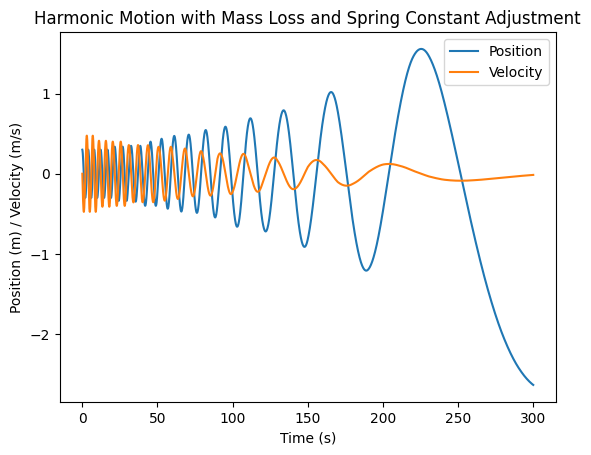

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def Leapfrog(niter=3000, dt=0.1, k=10, m=2, x0=0.3, v0=0):
  x = np.zeros(niter); v = np.zeros(niter) #Initialize position and velocity arrays
  x[0] = x0; v[0] = v0 #Initialize position and velocity initial values

  for i in range(1, niter):
    if (i % 100) == 0: #Check if it has been a multiple of 10 seconds
      k *= 0.75 #Reduce k by 25% if time % 10 sec is 0
    if x[i-1] * x[i] < 0: #Check if x has passed the center position
      m *= 0.95 #Reduce mass by 5% if position crosses 0

    a2 = (-k) * x[i-1] / (m)
    v[i] = v[i-1] + a2 * 0.5 * dt
    x[i] = x[i-1] + v[i-1] * dt + 0.5 * a2 * dt**2

  t = np.arange(0, niter * dt, dt) #Setup time array

  return t, x, v

# Run simulation
t, x, v = Leapfrog()

# Plot results
plt.plot(t, x, label='Position')
plt.plot(t, v, label='Velocity')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m) / Velocity (m/s)')
plt.title('Harmonic Motion with Mass Loss and Spring Constant Adjustment')
plt.show()

## Problem 4: Couple Differential Equations

Consider a case of two pendulums which both swing left and right.  There is a spring that connects the two masses together.  This is called a _connected pendulum_.  (There is a picture of this on https://en.wikipedia.org/wiki/Pendulum_(mathematics) -- Scroll down to Coupled Pendula.)  

This system is described by:

$$\frac{{\tt d}^2 x_1}{{\tt d}t^2} = \frac{g}{L} x_1 + \frac{k(x_2-x_1)}{m}$$

$$\frac{{\tt d}^2 x_2}{{\tt d}t^2} = \frac{g}{L} x_2 - \frac{k(x_1-x_2)}{m}$$

The variables are $m$ is mass, $x_1$ and $x_2$ are the positions of the masses on the end of the pendulum, $k$ is a strength constant, $L$ is the length of each pendulum.  Use 500 time steps from 0 to 30 s.  Uses $m=1$ and $k=1$.

The initial conditions are $x_1=0$ m, $x_2=1$ m, $\frac{{\tt d}x_1}{{\tt d}t} = 0$ m/s, and $\frac{{\tt d}x_2}{{\tt d}t} = 0$ m/s.

Model this system and plot $x_1$ and $x_2$ on the same graph.

Hint 1:
$$\frac{{\tt d}^2 x_1}{{\tt d}t^2} = \left(\frac{{\tt d} x_1}{{\tt d}t}\right) \frac{{\tt d}}{{\tt d}t}$$

Hint 2:
If both pendulums start at the same position, then the spring between the masses will never stretch or expand.  Thus, you can test your code by starting both masses at the same position and see if their motions are identical.

In [3]:
import numpy as np
import scipy.integrate as si
import matplotlib.pyplot as plt

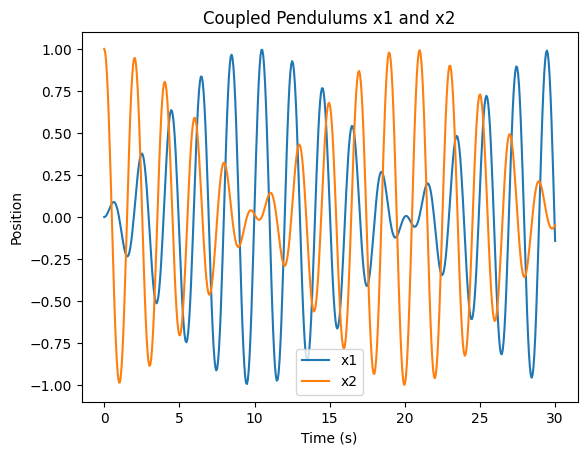

In [5]:
#Constants
m = 1; k = 1; g = 9.81; L = 1

#initial conditions
x0_1 = 0; x0_2 = 1; v0_1 = 0; v0_2 = 0

#Setup time and timesteps
t = np.linspace(0,30,500)

#Setup integral
def model1(x12dx12,t):
  x1, x2, v1, v2 = x12dx12
  dx1dt = v1
  dx2dt = v2
  dv1dt = -g/L * np.sin(x1) + k/m * (x2 - x1)
  dv2dt = -g/L * np.sin(x2) - k/m * (x2 - x1)
  return [dx1dt, dx2dt, dv1dt, dv2dt]

#Integrate
inits = [x0_1,x0_2,v0_1,v0_2]
x12dx12 = si.odeint(model1,inits,t)

#Plot x1 and x2
plt.plot(t,x12dx12[:,0],label = 'x1')
plt.plot(t,x12dx12[:,1],label = 'x2')
plt.title('Coupled Pendulums x1 and x2')
plt.xlabel('Time (s)')
plt.ylabel('Position')
plt.legend()

## Bonus Problem: Massive Decisions

This problem is worth 10 bonus points.

Go to the website http://sudoku.com.  Select the level of difficulty to be 'hard' or 'expert'.  Take a screen shot of this puzzle.

1. Display your puzzle.
2. Create a new __Puzzle__ function for your puzzle. Insert the command print(mat) at the end, so that your matrix is printed to the console, run this function.
3. Solve your puzzle using the __Sudoku__ function.

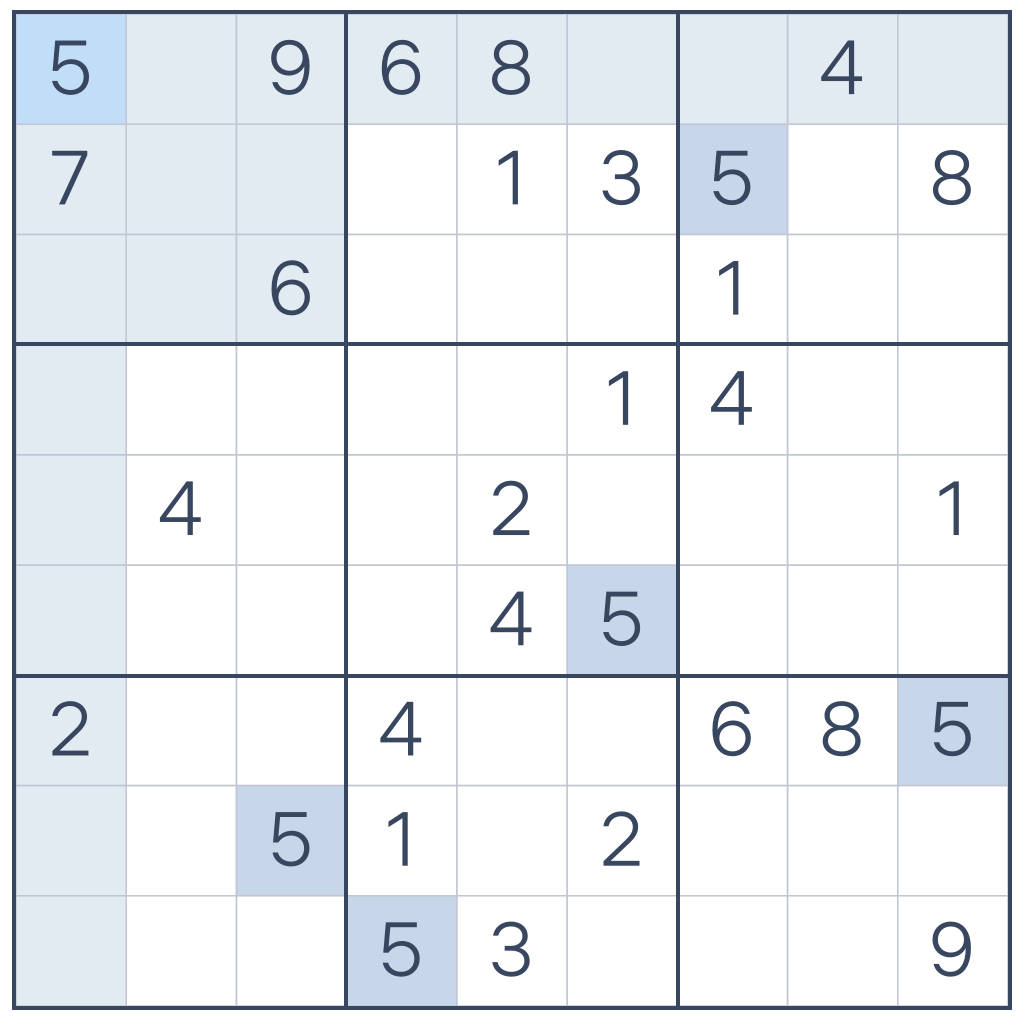

In [6]:
import numpy as np
import sys
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
sys.path.append('/content/drive/MyDrive/Colab Notebooks/CDS411')

import sudoku as doku

Mounted at /content/drive


In [7]:
#Create a new Puzzle function for your puzzle. Insert the command print(mat) at the end, so that your matrix is printed to the console, run this function.

def create_hard():
  mat = np.array([[5,-1,9,6,8,-1,-1,4,-1],
  [7,-1,-1,-1,1,3,5,-1,8],
  [-1,-1,6,-1,-1,-1,1,-1,-1],
  [-1,-1,-1,-1,-1,1,4,-1,-1],
  [-1,4,-1,-1,2,-1,-1,-1,1],
  [-1,-1,-1,-1,4,5,-1,-1,-1],
  [2,-1,-1,4,-1,-1,6,8,5],
  [-1,-1,5,1,-1,2,-1,-1,-1],
  [-1,-1,-1,5,3,-1,-1,-1,9]])
  print(mat)
  #print(mat.shape)

  return mat

mat = create_hard()

#Solve your puzzle using the Sudoku function.
dct = doku.ConvertMat(mat)
groups = doku.Architecture1()

doku.Sudoku(dct,groups)

[[ 5 -1  9  6  8 -1 -1  4 -1]
 [ 7 -1 -1 -1  1  3  5 -1  8]
 [-1 -1  6 -1 -1 -1  1 -1 -1]
 [-1 -1 -1 -1 -1  1  4 -1 -1]
 [-1  4 -1 -1  2 -1 -1 -1  1]
 [-1 -1 -1 -1  4  5 -1 -1 -1]
 [ 2 -1 -1  4 -1 -1  6  8  5]
 [-1 -1  5  1 -1  2 -1 -1 -1]
 [-1 -1 -1  5  3 -1 -1 -1  9]]
rule 1 5 7
rule 1 10 2
rule 1 11 4
rule 1 12 9
rule 1 59 9
rule 1 16 6
rule 1 21 2
rule 1 22 5
rule 1 23 4
rule 1 58 7
rule 1 67 6
rule 1 31 9
rule 1 77 8
rule 1 41 6
Rule 2 [(79, 1), (43, 5), (25, 9), (1, 1), (72, 4), (28, 5), (71, 4)]
rule 1 55 3
rule 1 74 7
rule 1 19 8
rule 1 56 1
rule 1 73 6
rule 1 78 2
rule 1 6 3
rule 1 18 3
rule 1 64 9
rule 1 8 2
rule 1 26 7
rule 1 46 7
rule 1 63 8
rule 1 69 7
rule 1 27 6
rule 1 36 9
rule 1 70 3
rule 1 35 3
rule 1 42 8
rule 1 45 1
rule 1 52 2
rule 1 34 7
rule 1 38 3
rule 1 51 9
rule 1 53 6
rule 1 30 8
rule 1 39 7
rule 1 47 8
rule 1 29 2
rule 1 48 3
  5  1  9  6  8  7  3  4  2
  7  2  4  9  1  3  5  6  8
  3  8  6  2  5  4  1  9  7
  6  5  2  8  9  1  4  7  3
  9  4  3  7  2  6  8 